
### **Goal:**
To build a hierarchical image classification model using MobileNetV2 for level_1 and level_2 classification tasks.

---

### **Steps Overview:**
1. **Load and Prepare the Dataset**
2. **Build the MobileNetV2 Model**
3. **Compile and Train the Model**
4. **Evaluate the Model**
5. **Visualize Results**

---

# 1. Load and Prepare the dataset 


loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
Number of images found:  306
[327.0, 2277.0, 440.0, 2280.0, 579.0, 2307.0, 671.0, 2346.0, 831.0, 2384.0, 865.0, 2404.0, 892.0, 2424.0, 947.0, 2450.0, 922.0, 2542.0, 850.0, 2533.0, 778.0, 2567.0, 724.0, 2559.0, 649.0, 2550.0, 540.0, 2561.0, 378.0, 2543.0, 268.0, 2512.0, 239.0, 2433.0, 237.0, 2376.0, 250.0, 2348.0, 278.0, 2308.0]
<class 'list'>


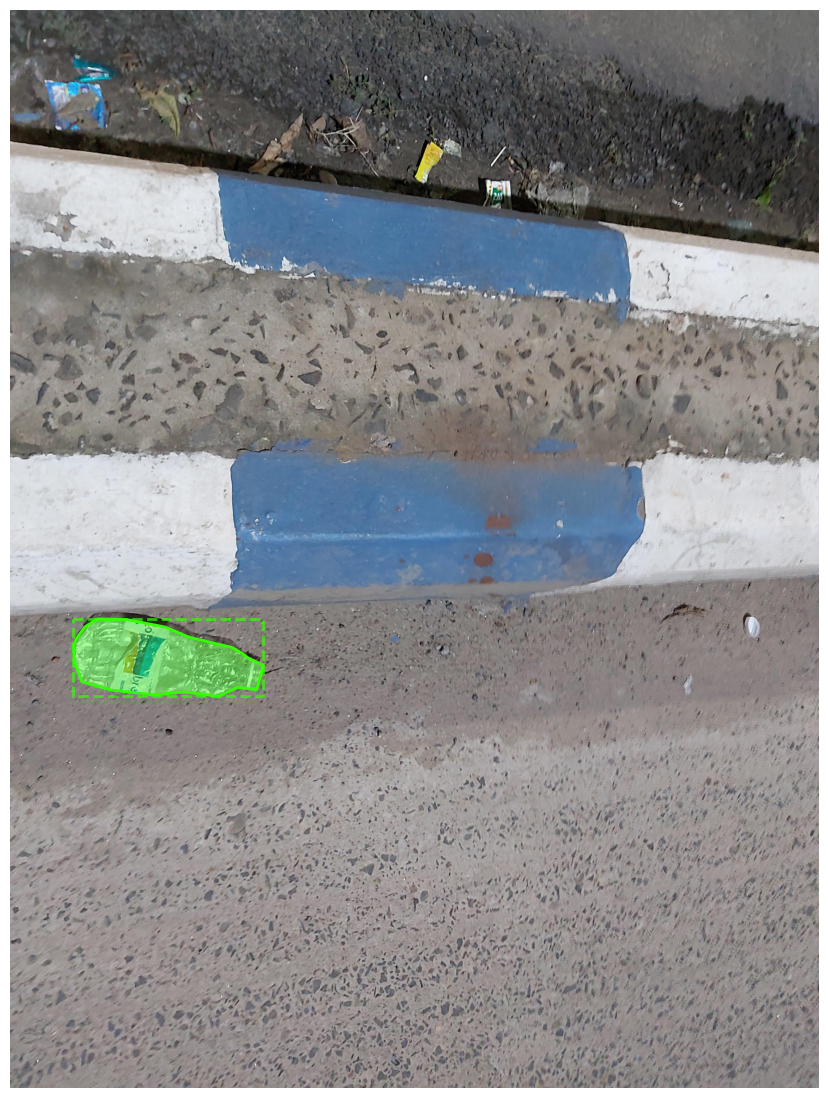

[973, 1723, 974, 1670, 993, 1645, 996, 1629, 1016, 1626, 1029, 1628, 1031, 1646, 1046, 1655, 1058, 1720, 1038, 1734, 995, 1731, 985, 1723]
<class 'list'>


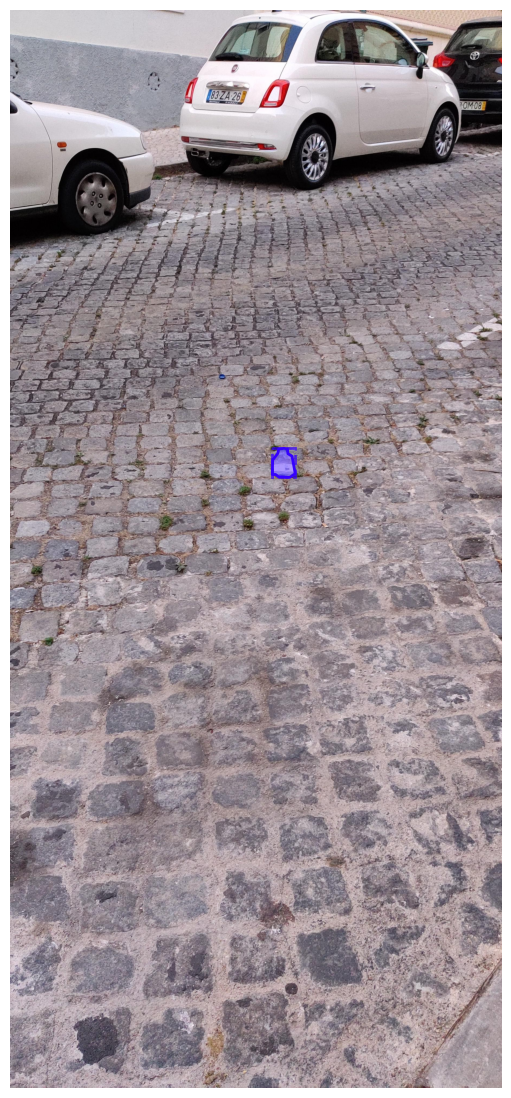

In [18]:
from PIL import Image, ExifTags
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import numpy as np
import colorsys
import random
import pylab


dataset_path = './data/split/train'
anns_file_path = dataset_path + '/' + 'annotations.json'

# User settings
nr_img_2_display = 2
category_name = 'Bottle'#  --- Insert the name of one of the categories or super-categories above
pylab.rcParams['figure.figsize'] = (14,14)
####################

# Obtain Exif orientation tag code
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

# Loads dataset as a coco object
coco = COCO(anns_file_path)

# Get image ids
imgIds = []
catIds = coco.getCatIds(catNms=[category_name])
if catIds:
    # Get all images containing an instance of the chosen category
    imgIds = coco.getImgIds(catIds=catIds)
else:
    # Get all images containing an instance of the chosen super category
    catIds = coco.getCatIds(supNms=[category_name])
    for catId in catIds:
        imgIds += (coco.getImgIds(catIds=catId))
    imgIds = list(set(imgIds))

nr_images_found = len(imgIds) 
print('Number of images found: ',nr_images_found)

# Select N random images
random.shuffle(imgIds)
imgs = coco.loadImgs(imgIds[0:min(nr_img_2_display,nr_images_found)])

for img in imgs:
    image_path = dataset_path + '/' + img['file_name']
    # Load image
    I = Image.open(image_path)
    
    # Load and process image metadata
    if I._getexif():
        exif = dict(I._getexif().items())
        # Rotate portrait and upside down images if necessary
        if orientation in exif:
            if exif[orientation] == 3:
                I = I.rotate(180,expand=True)
            if exif[orientation] == 6:
                I = I.rotate(270,expand=True)
            if exif[orientation] == 8:
                I = I.rotate(90,expand=True)
    
    # Show image
    fig,ax = plt.subplots(1)
    plt.axis('off')
    plt.imshow(I)

    # Load mask ids
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns_sel = coco.loadAnns(annIds)
    
    # Show annotations
    for ann in anns_sel:
        color = colorsys.hsv_to_rgb(np.random.random(),1,1)
        for seg in ann['segmentation']:
            print(seg)
            print(type(seg))
            poly = Polygon(np.array(seg).reshape((int(len(seg)/2), 2)))
            p = PatchCollection([poly], facecolor=color, edgecolors=color,linewidths=0, alpha=0.4)
            ax.add_collection(p)
            p = PatchCollection([poly], facecolor='none', edgecolors=color, linewidths=2)
            ax.add_collection(p)
        [x, y, w, h] = ann['bbox']
        rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                         facecolor='none', alpha=0.7, linestyle = '--')
        ax.add_patch(rect)

    plt.show()
